# <h1 align="center">Bird sounds Visualization</h1>

In this notebook we focus on birds sounds visualization

In [27]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=2)

# Load Packages and data

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display
import re

We have modified the mp3 format to wav using Itunes software

In [8]:
path = "/Users/eulalieformery/Desktop/Master Data/Dataviz"#path to folder loaded from mini vast challenge website
os.chdir(path)
birds=pd.read_csv('AllBirdsv4.csv')
test_birds=pd.read_csv('Test Birds Location.csv')

In [3]:
path2="" #path to our file containing all mp3 files
os.chdir(path2)

## Sound visualization for Birds of Kasios

<h3 style='red'> Waveplot </h3>


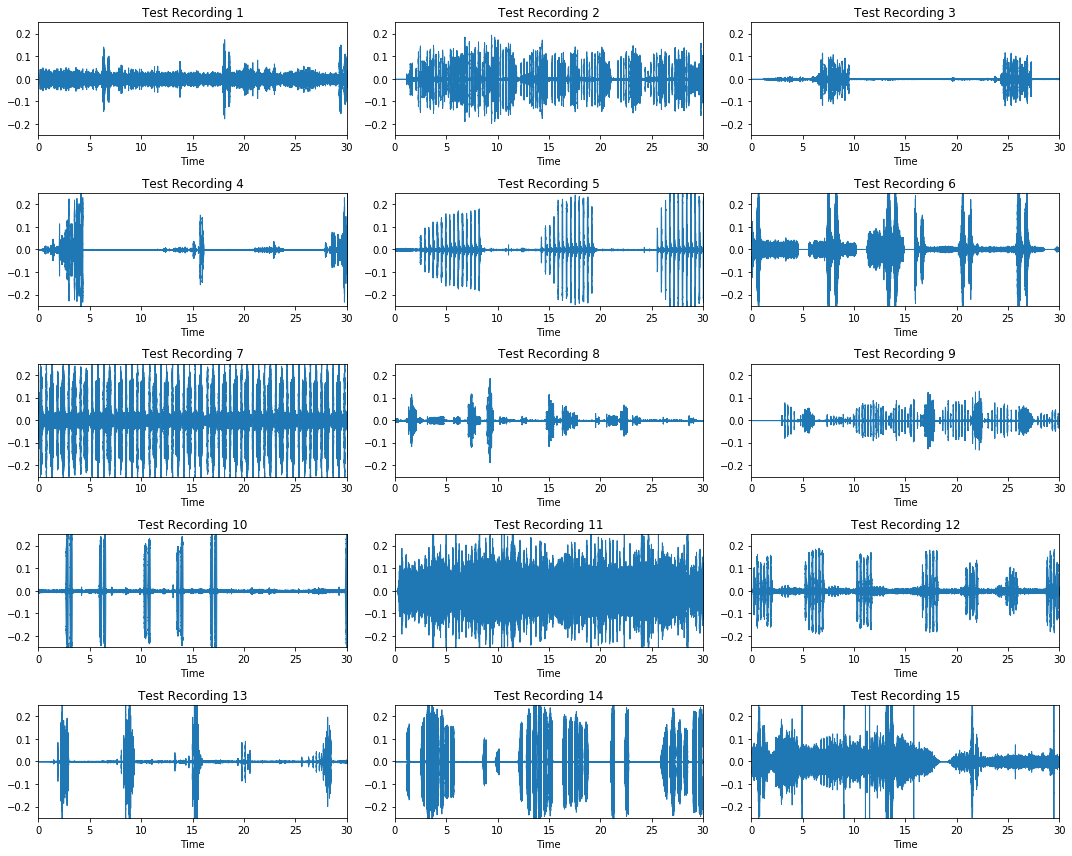

In [34]:
plt.figure(figsize=(15, 12))
for i in range(15):
    fig=plt.subplot(5, 3, i+1)
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 30)
    fig.set_ylim(-0.25,0.25)
    plt.title('Test Recording '+str(i+1))
plt.tight_layout()

<h3>Spectogram</h3>

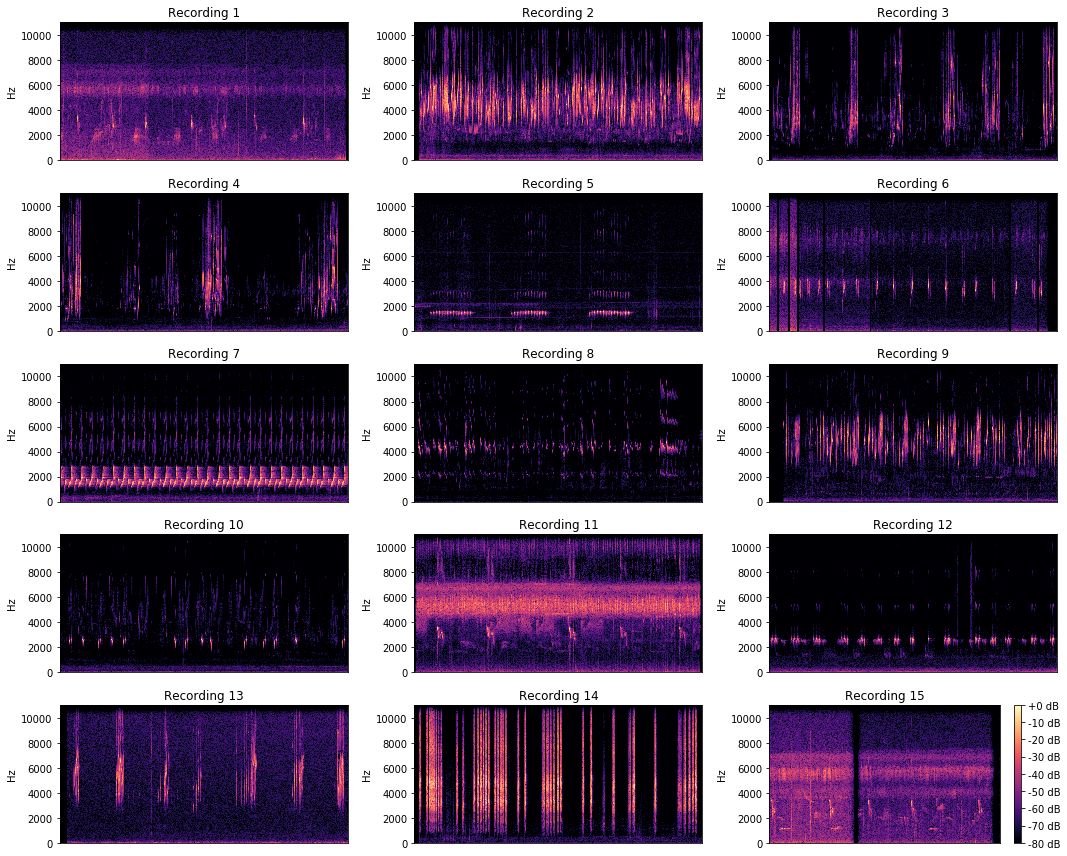

In [38]:
plt.figure(figsize=(15, 12))
for i in range(15):
    plt.subplot(5, 3, i+1)
    y, sr = librosa.load('Test Birds from Kasios/'+str(i+1)+'.wav')
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max) #db-scaled specrogram
    librosa.display.specshow(D, y_axis='linear')
    fig.set_xlim(0, 30)
    plt.title('Recording '+str(i+1))

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In this spectograms we can see that:
- birds 10 and 12 songs have mainly a high amplitude around frequency 2200
- birds 6 and 8 songs have mainly a high amplitude around frequency 4000


## Finding visual features on  Rose-crested blue pipits

In [6]:
Blue_pipits_songs=list(birds.loc[(birds['English_name']=='Rose-crested Blue Pipit')&(birds['Quality']=='A')&(birds['Vocalization_type']=='song'),'File ID'])[:20]
Blue_pipits_calls=list(birds.loc[(birds['English_name']=='Rose-crested Blue Pipit')&(birds['Quality']=='A')&(birds['Vocalization_type']=='call'),'File ID'])[:20]

In [7]:
songs_file=[]
calls_file=[]

for filename in os.listdir("/Volumes/Sans titre/Birds_sound"):
   
    for songs_id in Blue_pipits_songs:
        if str(songs_id) in filename:
            songs_file.append(filename)
    
    for calls_id in Blue_pipits_calls:
        if str(calls_id) in filename:
            calls_file.append(filename)

<h3>Waveplot for Blue Pipits songs</h3>

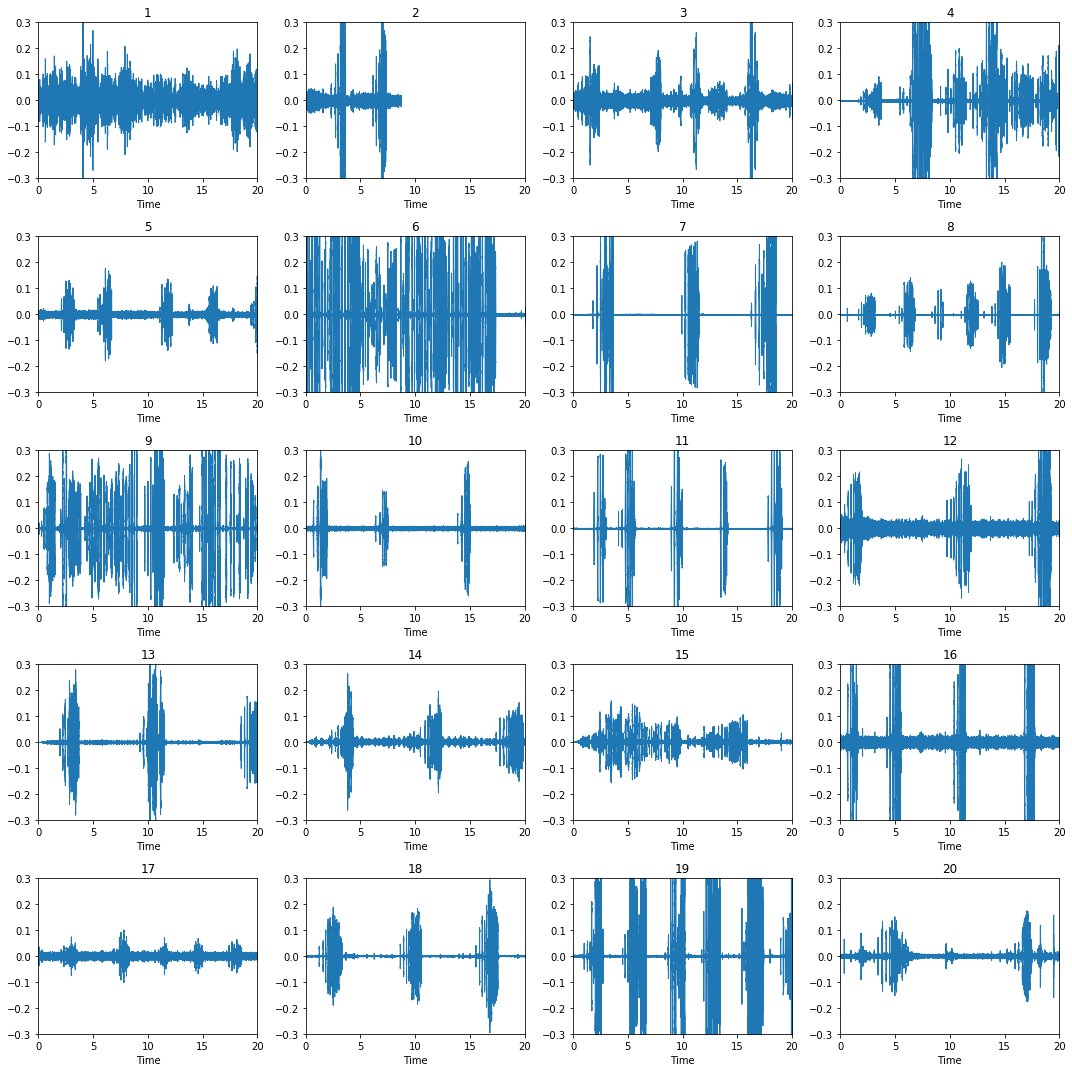

In [90]:
plt.figure(figsize=(15, 15))
for i in range(20):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Sans titre/Birds_sound/"+str(songs_file[i]))
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 20)
    fig.set_ylim(-0.3,0.3)
    plt.title(str(i+1))
    
plt.tight_layout()


For songs, it seems to be periodic, of around 6 sec. It has its own shape, increasing , reaching a peak and decreasing in a quicker way.

<h3>Waveplot for Blue Pipits calls</h3>

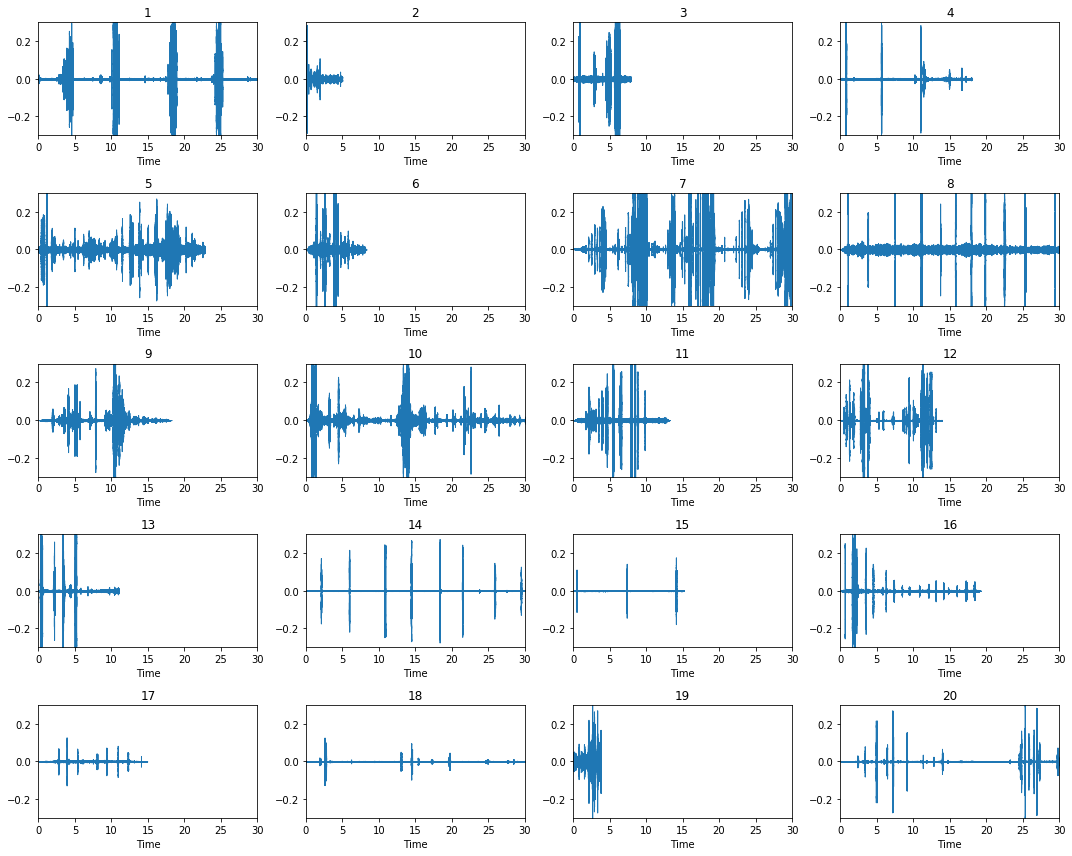

In [88]:
plt.figure(figsize=(15, 12))
for i in range(20):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Sans titre/Birds_sound/"+str(calls_file[i]))
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 30)
    fig.set_ylim(-0.3,0.3)
    plt.title(str(i+1))

plt.tight_layout()


We notice that songs and calls really have different aspects for a same bird. Calls are often shorter and, consist of singular peaks with very high amplitude. 


<h3>Spectogram for Blue Pipits</h3>

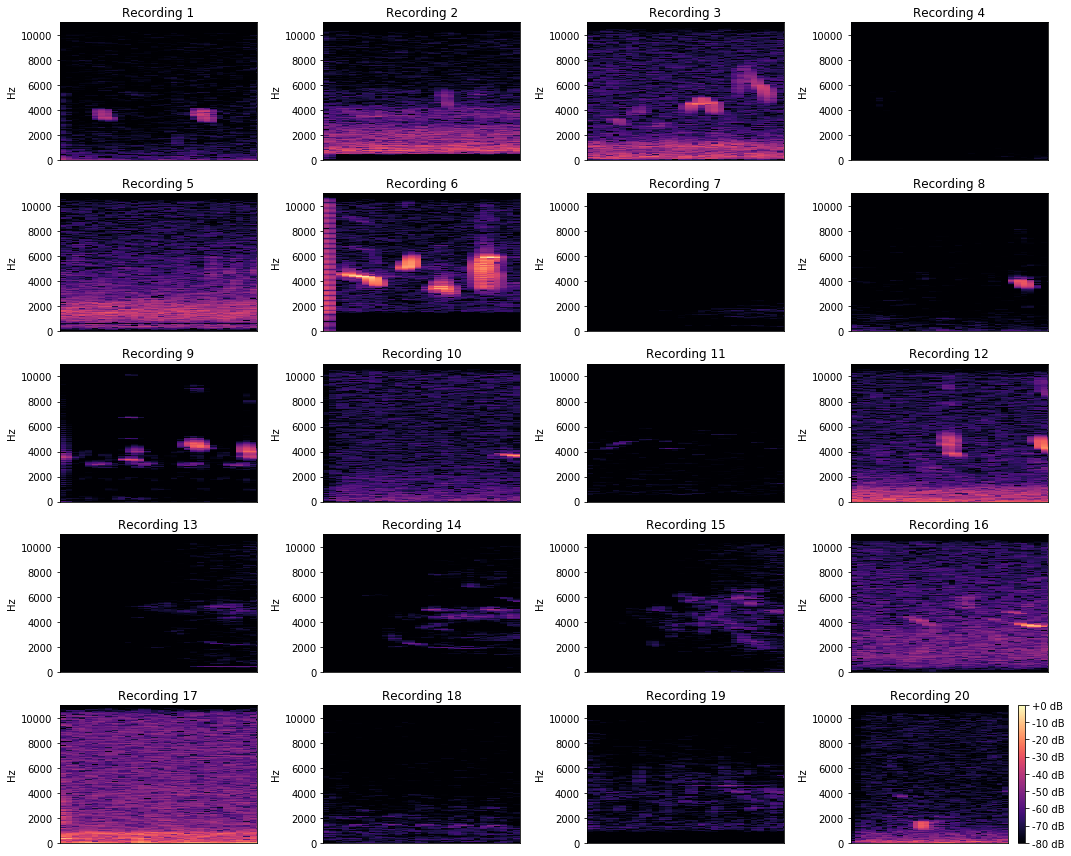

In [11]:
plt.figure(figsize=(15, 12))
for i in range(20):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Sans titre/Birds_sound/"+str(songs_file[i]))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max) #db-scaled specrogram
    librosa.display.specshow(D, y_axis='linear')
    fig.set_xlim(0, 30)
    plt.title('Recording '+str(i+1))

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Blue pipit has a high magnitude for 4000 to 6000 Hz frequency, and in a periodic way.

## Choice of a representative sound for each bird

We iterate this process with each bird and chose manually the waveplot that seems to be the most representative

In [14]:
Birds_songs=list(birds.loc[(birds['English_name']=='Rose-crested Blue Pipit')&(birds['Quality'].isin(['A','B']))&(birds['Vocalization_type']=='call'),'File ID'])[:20]
songs_file=[]

for filename in os.listdir("/Volumes/Disque_dur/WAV"):
   
    for songs_id in Birds_songs:
        if str(songs_id) in filename:
            songs_file.append(filename)
 


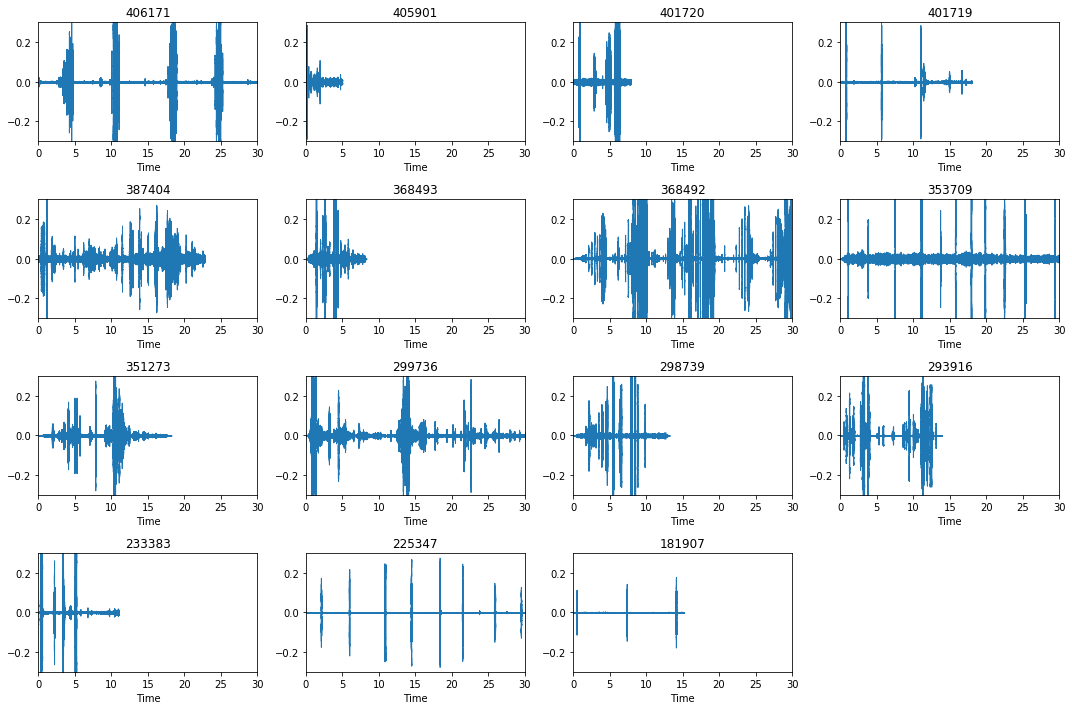

In [115]:
plt.figure(figsize=(15, 12))
for i in range(15):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Disque_dur/WAV/"+str(songs_file[i]))
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 30)
    fig.set_ylim(-0.3,0.3)
    plt.title(Birds_songs[i])
    
plt.tight_layout()


For each type we chose a representative sounds, that we will use later in the dashboard

- Qax : 115736 
- Scrawny Jay : 143351
- Canadian Cootamum : 313736 
- Broad-winged Jojo :165751
- Rose- crested Blue Pipit : 152971
- Blue-collared Zipper : 95988 
- Bombadil : 206157
- Carries Champagne Pipit : 197378 
- Darkwing Sparrow : 405293 
- Eastern Corn Skeet: 132866 
- Green-tipped Scarlet Pipit : 221675 
- Lesser Birchbeere: 81078 
- Ora ge Pine Plawer : 370944 
- Ordinary Snape: 132146 
- Purple Tooting tout : 179947
- Queenscoat: 343363
- Bent beak riffraff: 88452 
- Vermillion Trillian: 127538



 <h3> Representative waveform for each species </h3>


In [ ]:
plt.figure(figsize=(15, 12))
for i in range(15):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Disque_dur/WAV/"+str(songs_file[i]))
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 30)
    fig.set_ylim(-0.3,0.3)
    plt.title(Birds_songs[i])
    
plt.tight_layout()


In [22]:
Index = ['115736','143351','313736','165751','152971','95988','206157',
        '197378','405293','132866','221675','81078','370944','132146',
        '179947','343363','88452','127538']

birds_name = ['Qax','Scrawny Jay','Canadian Cootamum','Broad-winged Jojo',
'Rose- crested Blue Pipit', 'Blue-collared Zipper','Bombadil',
'Carries Champagne Pipit', 'Darkwing Sparrow','Eastern Corn Skeet',
'Green-tipped Scarlet Pipit','Lesser Birchbeere','Orange Pine Plawer', 
'Ordinary Snape','Purple Tooting tout' ,'Queenscoat','Bent beak riffraff','Vermillion Trillian'] 

In [23]:
Index_id = []
for filename in os.listdir("/Volumes/Disque_dur/WAV"):
   
    for songs_id in Index:
        if str(songs_id) in filename:
            Index_id.append(filename)

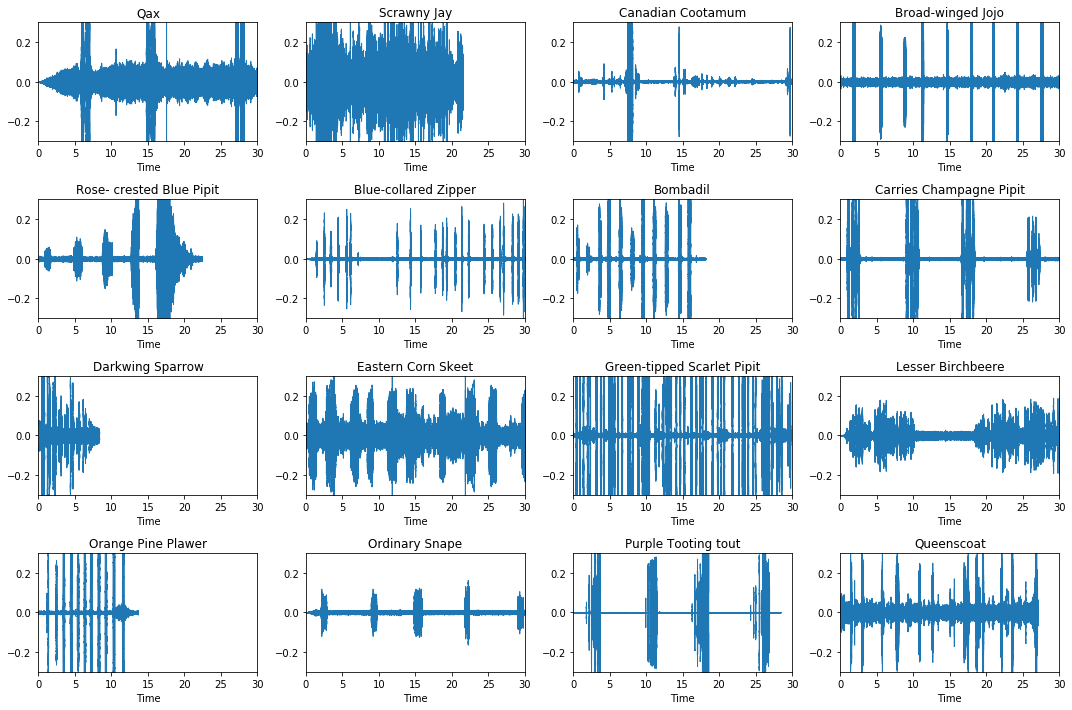

In [26]:
plt.figure(figsize=(15, 12))
for i in range(16):
    fig=plt.subplot(5, 4, i+1)
    y, sr = librosa.load("/Volumes/Disque_dur/WAV/"+Index_id[i])
    librosa.display.waveplot(y, sr)
    fig.set_xlim(0, 30)
    fig.set_ylim(-0.3,0.3)
    plt.title(birds_name[i])
    
plt.tight_layout()